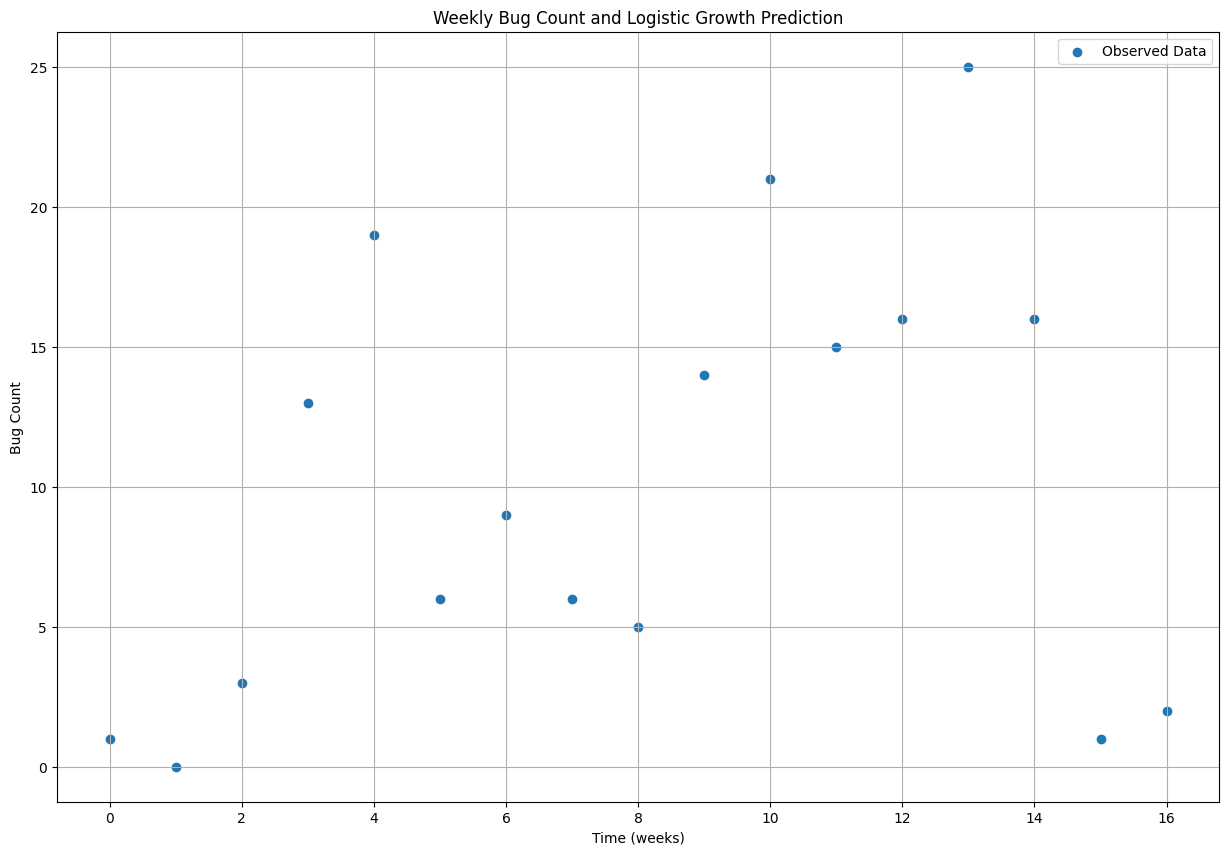

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided text
data = {
    "4/2/2023": 1, "4/10/2023": 2, "4/14/2023": 1, "4/17/2023": 1, "4/18/2023": 1, "4/19/2023": 4, "4/20/2023": 4, "4/21/2023": 3, "4/24/2023": 3, "4/25/2023": 1, "4/26/2023": 1, "4/27/2023": 7, "4/28/2023": 6, "4/29/2023": 1, "5/1/2023": 1, "5/3/2023": 2, "5/5/2023": 2, "5/7/2023": 1, "5/8/2023": 1, "5/9/2023": 1, "5/10/2023": 1, "5/11/2023": 4, "5/12/2023": 1, "5/14/2023": 1, "5/15/2023": 1, "5/17/2023": 1, "5/18/2023": 1, "5/19/2023": 1, "5/20/2023": 1, "5/21/2023": 1, "5/22/2023": 1, "5/23/2023": 2, "5/24/2023": 1, "5/25/2023": 1, "5/29/2023": 6, "5/30/2023": 4, "6/1/2023": 2, "6/4/2023": 2, "6/5/2023": 3, "6/6/2023": 9, "6/7/2023": 3, "6/8/2023": 3, "6/9/2023": 2, "6/11/2023": 1, "6/12/2023": 1, "6/13/2023": 3, "6/14/2023": 2, "6/15/2023": 2, "6/16/2023": 3, "6/17/2023": 1, "6/18/2023": 3, "6/19/2023": 3, "6/20/2023": 3, "6/21/2023": 5, "6/22/2023": 4, "6/23/2023": 1, "6/26/2023": 4, "6/27/2023": 4, "6/28/2023": 6, "6/29/2023": 4, "6/30/2023": 7, "7/3/2023": 1, "7/4/2023": 2, "7/5/2023": 10, "7/6/2023": 2, "7/9/2023": 1, "7/11/2023": 1, "7/18/2023": 2
}

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(list(data.items()), columns=["Date", "Value"])

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Resample the data to weekly frequency and sum the values
weekly_data = df.resample('W').sum()

# Define logistic growth model
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit the logistic model
time_data = np.arange(len(weekly_data))
population_data = weekly_data["Value"].values

# Initial parameter guess
p0 = [max(population_data), 0.1, len(time_data)/2]
params, _ = opt.curve_fit(logistic, time_data, population_data, p0)

# Create future time points for prediction
time_future = np.arange(len(time_data) + 10)
population_future = logistic(time_future, *params)

# Calculate confidence intervals
alpha = 0.05
lower_bound_logistic = population_future * (1 - alpha)
upper_bound_logistic = population_future * (1 + alpha)

# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(time_data, population_data, label='Observed Data')
# plt.plot(time_future, population_future, label='Fitted Logistic Curve', color='red')
# plt.fill_between(time_future, lower_bound_logistic, upper_bound_logistic, color='red', alpha=0.3, label='Logistic CI')

plt.xlabel('Time (weeks)')
plt.ylabel('Bug Count')
plt.title('Weekly Bug Count and Logistic Growth Prediction')
plt.legend()
plt.grid(True)
plt.show()


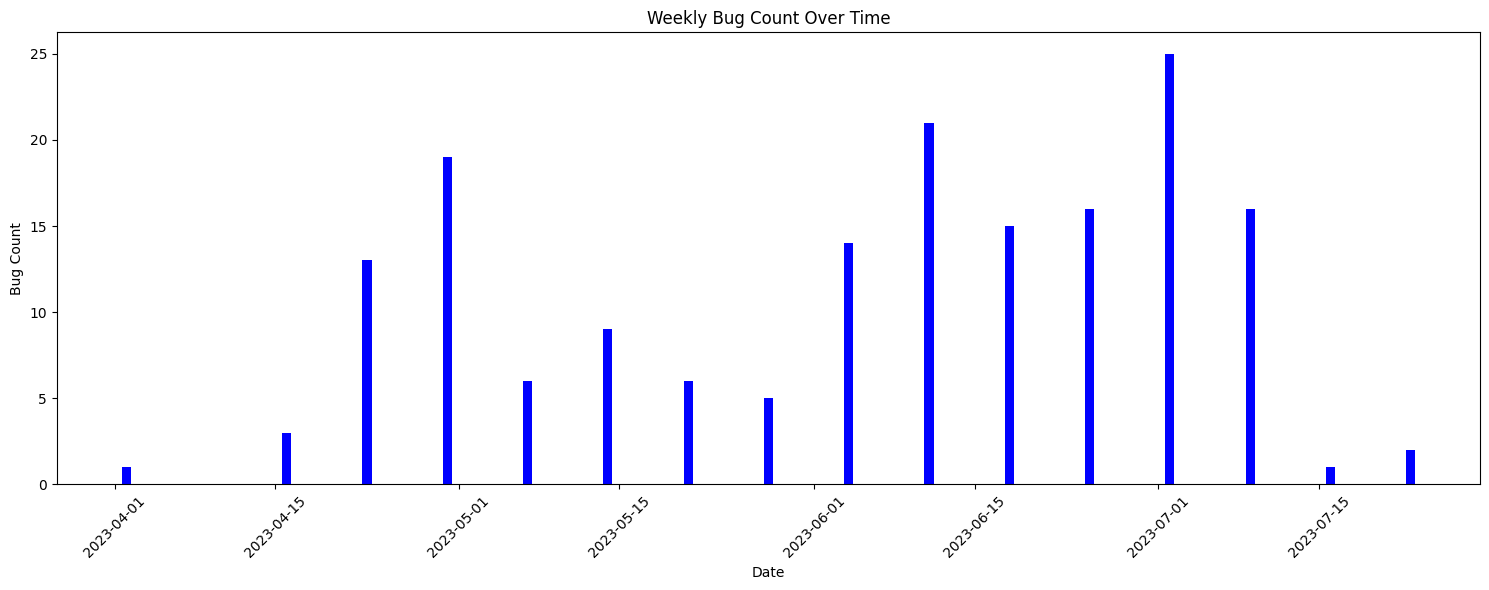

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided text
data = {
    "4/2/2023": 1, "4/10/2023": 2, "4/14/2023": 1, "4/17/2023": 1, "4/18/2023": 1, "4/19/2023": 4, "4/20/2023": 4, "4/21/2023": 3, "4/24/2023": 3, "4/25/2023": 1, "4/26/2023": 1, "4/27/2023": 7, "4/28/2023": 6, "4/29/2023": 1, "5/1/2023": 1, "5/3/2023": 2, "5/5/2023": 2, "5/7/2023": 1, "5/8/2023": 1, "5/9/2023": 1, "5/10/2023": 1, "5/11/2023": 4, "5/12/2023": 1, "5/14/2023": 1, "5/15/2023": 1, "5/17/2023": 1, "5/18/2023": 1, "5/19/2023": 1, "5/20/2023": 1, "5/21/2023": 1, "5/22/2023": 1, "5/23/2023": 2, "5/24/2023": 1, "5/25/2023": 1, "5/29/2023": 6, "5/30/2023": 4, "6/1/2023": 2, "6/4/2023": 2, "6/5/2023": 3, "6/6/2023": 9, "6/7/2023": 3, "6/8/2023": 3, "6/9/2023": 2, "6/11/2023": 1, "6/12/2023": 1, "6/13/2023": 3, "6/14/2023": 2, "6/15/2023": 2, "6/16/2023": 3, "6/17/2023": 1, "6/18/2023": 3, "6/19/2023": 3, "6/20/2023": 3, "6/21/2023": 5, "6/22/2023": 4, "6/23/2023": 1, "6/26/2023": 4, "6/27/2023": 4, "6/28/2023": 6, "6/29/2023": 4, "6/30/2023": 7, "7/3/2023": 1, "7/4/2023": 2, "7/5/2023": 10, "7/6/2023": 2, "7/9/2023": 1, "7/11/2023": 1, "7/18/2023": 2
}

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(list(data.items()), columns=["Date", "Value"])

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Resample the data to weekly frequency and sum the values
weekly_data = df.resample('W').sum()

# Visualization
plt.figure(figsize=(15, 6))
plt.bar(weekly_data.index, weekly_data["Value"], color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Bug Count')
plt.title('Weekly Bug Count Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better viewing
plt.tight_layout()

# Show the plot
plt.show()


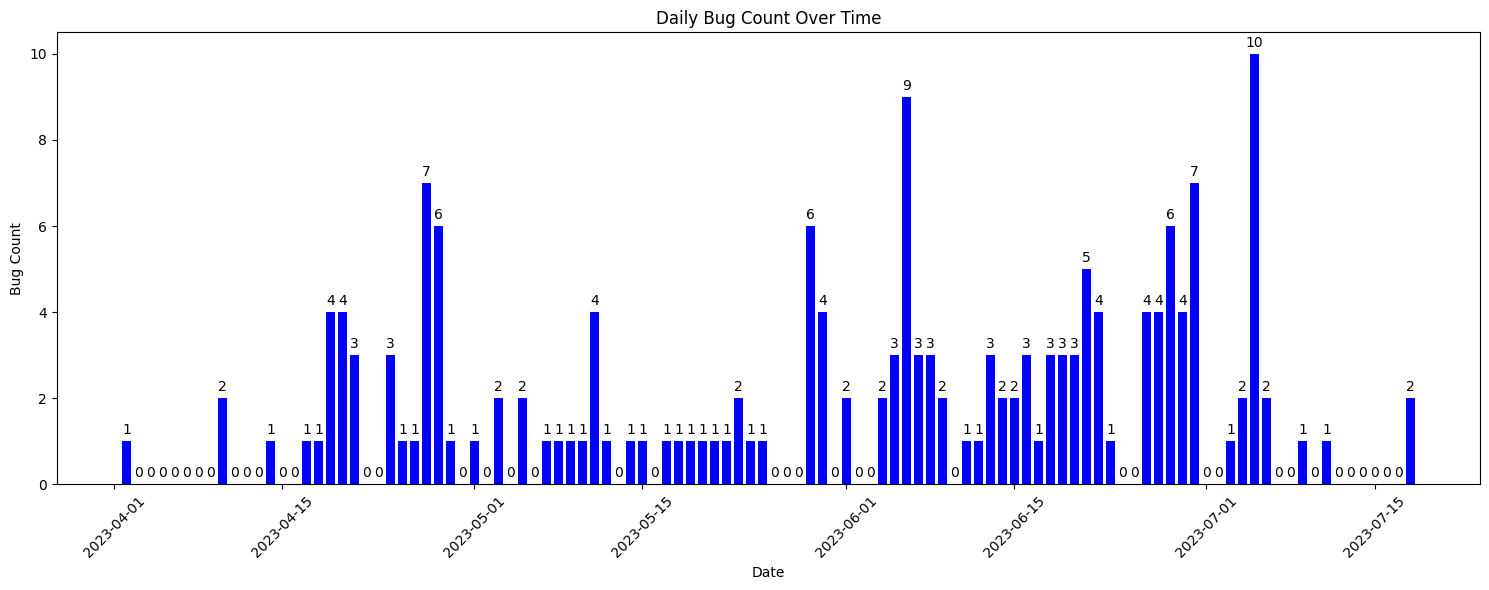

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided text
data = {
    "4/2/2023": 1, "4/10/2023": 2, "4/14/2023": 1, "4/17/2023": 1, "4/18/2023": 1, "4/19/2023": 4, "4/20/2023": 4, "4/21/2023": 3, "4/24/2023": 3, "4/25/2023": 1, "4/26/2023": 1, "4/27/2023": 7, "4/28/2023": 6, "4/29/2023": 1, "5/1/2023": 1, "5/3/2023": 2, "5/5/2023": 2, "5/7/2023": 1, "5/8/2023": 1, "5/9/2023": 1, "5/10/2023": 1, "5/11/2023": 4, "5/12/2023": 1, "5/14/2023": 1, "5/15/2023": 1, "5/17/2023": 1, "5/18/2023": 1, "5/19/2023": 1, "5/20/2023": 1, "5/21/2023": 1, "5/22/2023": 1, "5/23/2023": 2, "5/24/2023": 1, "5/25/2023": 1, "5/29/2023": 6, "5/30/2023": 4, "6/1/2023": 2, "6/4/2023": 2, "6/5/2023": 3, "6/6/2023": 9, "6/7/2023": 3, "6/8/2023": 3, "6/9/2023": 2, "6/11/2023": 1, "6/12/2023": 1, "6/13/2023": 3, "6/14/2023": 2, "6/15/2023": 2, "6/16/2023": 3, "6/17/2023": 1, "6/18/2023": 3, "6/19/2023": 3, "6/20/2023": 3, "6/21/2023": 5, "6/22/2023": 4, "6/23/2023": 1, "6/26/2023": 4, "6/27/2023": 4, "6/28/2023": 6, "6/29/2023": 4, "6/30/2023": 7, "7/3/2023": 1, "7/4/2023": 2, "7/5/2023": 10, "7/6/2023": 2, "7/9/2023": 1, "7/11/2023": 1, "7/18/2023": 2
}

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(list(data.items()), columns=["Date", "Value"])

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Reindex to include all days in the date range
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max()), fill_value=0)

# Visualization
plt.figure(figsize=(15, 6))
bars = plt.bar(df.index, df["Value"], color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Bug Count')
plt.title('Daily Bug Count Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Adjust layout for better viewing
plt.tight_layout()

# Show the plot
plt.show()


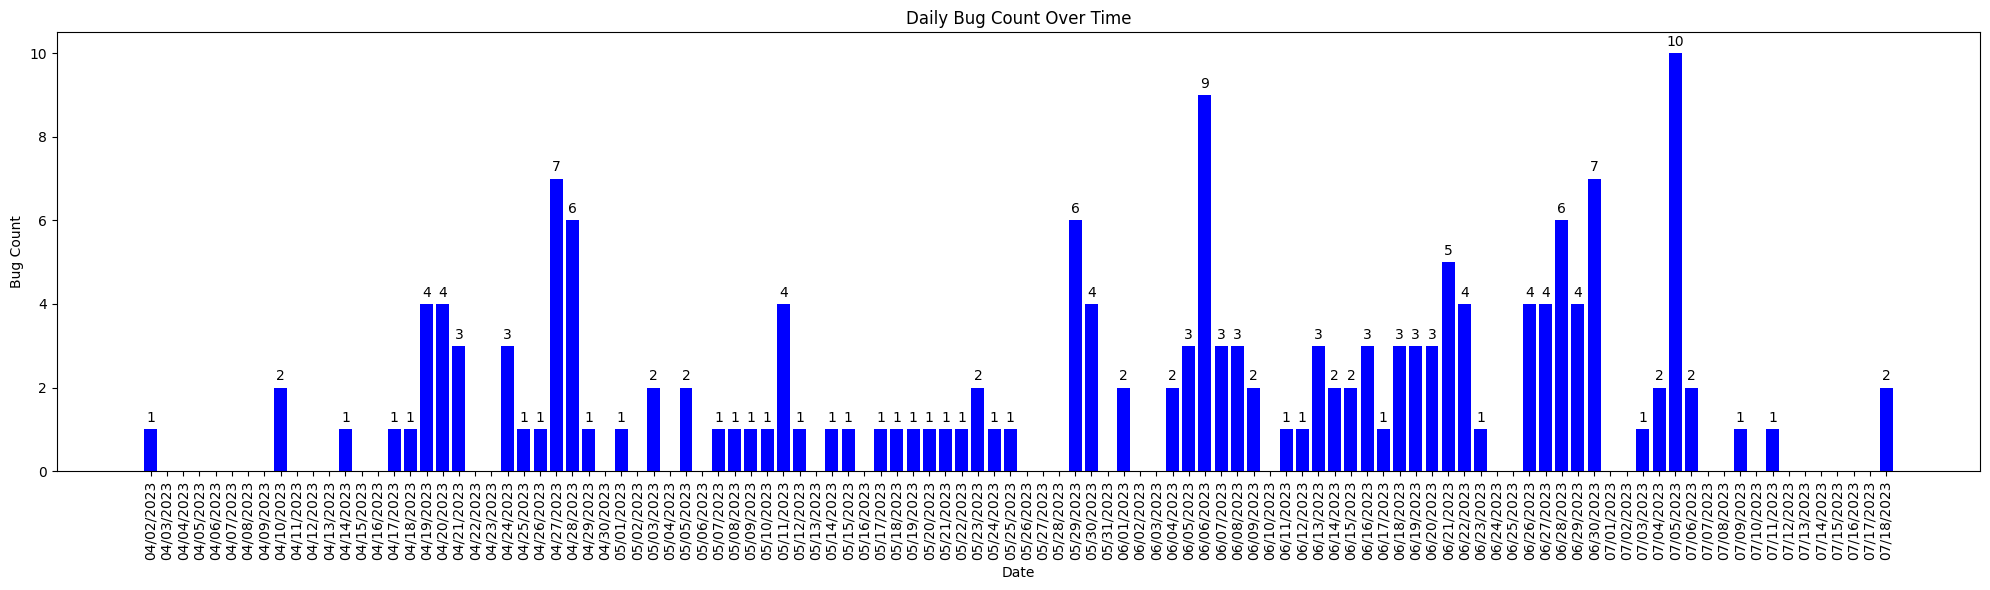

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided text
data = {
    "4/2/2023": 1, "4/10/2023": 2, "4/14/2023": 1, "4/17/2023": 1, "4/18/2023": 1, "4/19/2023": 4, "4/20/2023": 4, "4/21/2023": 3, "4/24/2023": 3, "4/25/2023": 1, "4/26/2023": 1, "4/27/2023": 7, "4/28/2023": 6, "4/29/2023": 1, "5/1/2023": 1, "5/3/2023": 2, "5/5/2023": 2, "5/7/2023": 1, "5/8/2023": 1, "5/9/2023": 1, "5/10/2023": 1, "5/11/2023": 4, "5/12/2023": 1, "5/14/2023": 1, "5/15/2023": 1, "5/17/2023": 1, "5/18/2023": 1, "5/19/2023": 1, "5/20/2023": 1, "5/21/2023": 1, "5/22/2023": 1, "5/23/2023": 2, "5/24/2023": 1, "5/25/2023": 1, "5/29/2023": 6, "5/30/2023": 4, "6/1/2023": 2, "6/4/2023": 2, "6/5/2023": 3, "6/6/2023": 9, "6/7/2023": 3, "6/8/2023": 3, "6/9/2023": 2, "6/11/2023": 1, "6/12/2023": 1, "6/13/2023": 3, "6/14/2023": 2, "6/15/2023": 2, "6/16/2023": 3, "6/17/2023": 1, "6/18/2023": 3, "6/19/2023": 3, "6/20/2023": 3, "6/21/2023": 5, "6/22/2023": 4, "6/23/2023": 1, "6/26/2023": 4, "6/27/2023": 4, "6/28/2023": 6, "6/29/2023": 4, "6/30/2023": 7, "7/3/2023": 1, "7/4/2023": 2, "7/5/2023": 10, "7/6/2023": 2, "7/9/2023": 1, "7/11/2023": 1, "7/18/2023": 2
}

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(list(data.items()), columns=["Date", "Value"])

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Reindex to include all days in the date range
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max()), fill_value=0)

# Visualization
plt.figure(figsize=(20, 6))
bars = plt.bar(df.index, df["Value"], color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Bug Count')
plt.title('Daily Bug Count Over Time')

# Set the x-ticks to show all dates
plt.xticks(df.index, df.index.strftime('%m/%d/%Y'), rotation=90)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Adjust layout for better viewing
plt.tight_layout()

# Show the plot
plt.show()


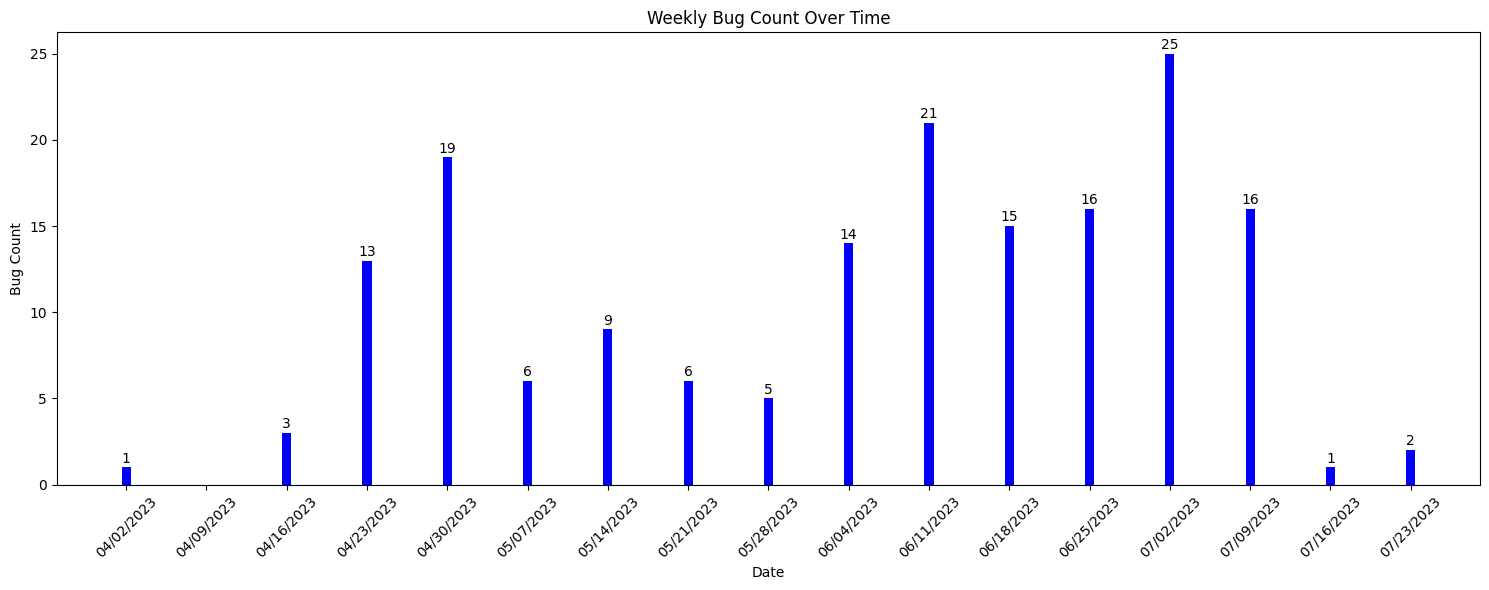

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided text
data = {
    "4/2/2023": 1, "4/10/2023": 2, "4/14/2023": 1, "4/17/2023": 1, "4/18/2023": 1, "4/19/2023": 4, "4/20/2023": 4, "4/21/2023": 3, "4/24/2023": 3, "4/25/2023": 1, "4/26/2023": 1, "4/27/2023": 7, "4/28/2023": 6, "4/29/2023": 1, "5/1/2023": 1, "5/3/2023": 2, "5/5/2023": 2, "5/7/2023": 1, "5/8/2023": 1, "5/9/2023": 1, "5/10/2023": 1, "5/11/2023": 4, "5/12/2023": 1, "5/14/2023": 1, "5/15/2023": 1, "5/17/2023": 1, "5/18/2023": 1, "5/19/2023": 1, "5/20/2023": 1, "5/21/2023": 1, "5/22/2023": 1, "5/23/2023": 2, "5/24/2023": 1, "5/25/2023": 1, "5/29/2023": 6, "5/30/2023": 4, "6/1/2023": 2, "6/4/2023": 2, "6/5/2023": 3, "6/6/2023": 9, "6/7/2023": 3, "6/8/2023": 3, "6/9/2023": 2, "6/11/2023": 1, "6/12/2023": 1, "6/13/2023": 3, "6/14/2023": 2, "6/15/2023": 2, "6/16/2023": 3, "6/17/2023": 1, "6/18/2023": 3, "6/19/2023": 3, "6/20/2023": 3, "6/21/2023": 5, "6/22/2023": 4, "6/23/2023": 1, "6/26/2023": 4, "6/27/2023": 4, "6/28/2023": 6, "6/29/2023": 4, "6/30/2023": 7, "7/3/2023": 1, "7/4/2023": 2, "7/5/2023": 10, "7/6/2023": 2, "7/9/2023": 1, "7/11/2023": 1, "7/18/2023": 2
}

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(list(data.items()), columns=["Date", "Value"])

# Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Resample the data to weekly frequency and sum the values
weekly_data = df.resample('W').sum()

# Visualization
plt.figure(figsize=(15, 6))
bars = plt.bar(weekly_data.index, weekly_data["Value"], color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Bug Count')
plt.title('Weekly Bug Count Over Time')

# Set the x-ticks to show all weeks
plt.xticks(weekly_data.index, weekly_data.index.strftime('%m/%d/%Y'), rotation=45)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Adjust layout for better viewing
plt.tight_layout()

# Show the plot
plt.show()
